In [39]:
#import libraries 
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# metrics for evaluation
from sklearn.metrics import jaccard_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# visualization libs
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [40]:
#to walk through the code easily , putting the path for the dataset and join dirname, filename
import os
for dirname, _, filenames in os.walk('/kaggle/input/amazon-product-review-spam-and-non-spam/part.json/part.json'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [41]:
#read the file we have to work on 
data = pd.read_json("/kaggle/input/amazon-product-review-spam-and-non-spam/part.json/part.json", lines=True)

In [42]:
# using shape to see the number of columns and rows 
data.shape

(99939, 13)

# preprocessing 

In [43]:
#to see the non null count for each column and to see the datatype for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99939 entries, 0 to 99938
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       99939 non-null  object 
 1   reviewerID                99939 non-null  object 
 2   asin                      99939 non-null  object 
 3   reviewerName              99215 non-null  object 
 4   helpful                   99939 non-null  object 
 5   reviewText                99939 non-null  object 
 6   overall                   99939 non-null  int64  
 7   summary                   99939 non-null  object 
 8   unixReviewTime            99939 non-null  int64  
 9   reviewTime                99939 non-null  object 
 10  category                  99939 non-null  object 
 11  BehaviouralFeatureResult  99939 non-null  object 
 12  label                     19749 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 9.9+ MB


In [44]:
#to check if there is any missing values 
#as we can see there is missing values in 2 columns (reviwerID, label)
data.isna().sum()

_id                             0
reviewerID                      0
asin                            0
reviewerName                  724
helpful                         0
reviewText                      0
overall                         0
summary                         0
unixReviewTime                  0
reviewTime                      0
category                        0
BehaviouralFeatureResult        0
label                       80190
dtype: int64

In [45]:
#to fill the missing value 
reviewerName_mode = data.reviewerName.mode()[0]
print(reviewerName_mode)

data.fillna(reviewerName_mode, inplace=True)

Amazon Customer


In [46]:
#to fill the missing value 
label_mode = data.label.mode()[0]
print(label_mode)

data.fillna(label_mode, inplace=True)

Amazon Customer


In [47]:
#to check if the fixing is done correctly and the missing values are gone 
#by filling them using the mode() fuction for the columns that had missing values
data.isna().sum()

_id                         0
reviewerID                  0
asin                        0
reviewerName                0
helpful                     0
reviewText                  0
overall                     0
summary                     0
unixReviewTime              0
reviewTime                  0
category                    0
BehaviouralFeatureResult    0
label                       0
dtype: int64

In [110]:
data

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,BehaviouralFeatureResult,label
0,{'$oid': '5a421d732bfbb88f180e24d2'},A3ITLRYWLKJP5B,B000809PCG,Barry,"[1.0, 2.0]","it's ok, but not great fun. maybe it just mak...",3,Not the first game I reach for...,1357689600,"01 9, 2013",Toys_and_Games,"{'CS': 0.5259506810000001, 'MNR': 0.0, 'RB': 0...",0.0
1,{'$oid': '5a421d732bfbb88f180e24d3'},AA65S7IF7V9GU,B004Y6F9KW,J Ayles,"[0.0, 0.0]",I love this Air-soft rifle. I love the scope i...,5,Cool,1314230400,"08 25, 2011",Sports_and_Outdoors,"{'CS': 0.0, 'MNR': 0.0, 'RB': 0.0, 'RC': 0.0, ...",0.0
2,{'$oid': '5a421d732bfbb88f180e24d4'},A3EBF7VUVF09GW,B0041RR5X8,"Helene M. Jolley ""Shopaholic""","[0.0, 0.0]",Bought this for my new bathroom and though it ...,3,Flimsy but serviceable,1341705600,"07 8, 2012",Home_and_Kitchen,"{'CS': 0.639148171, 'MNR': 0.0, 'RB': 0.0, 'RC...",0.0
3,{'$oid': '5a421d732bfbb88f180e24d5'},A14YSDP7TH705X,B00066D6KO,amazonfan111,"[0.0, 0.0]","I guess the description of ""4 lbs of force nee...",3,"""Medium weight"" = very light",1377302400,"08 24, 2013",Sports_and_Outdoors,"{'CS': 0.360997436, 'MNR': 1.0, 'RB': 1.0, 'RC...",0.0
4,{'$oid': '5a421d732bfbb88f180e24d6'},A2VNHQNN1T3KKN,B0057MGKO6,sherri,"[0.0, 0.0]",Only receive 5 of the 10? What's up with that?...,1,Only received 5 of the 10! What's up with that...,1390867200,"01 28, 2014",Toys_and_Games,"{'CS': 0.0, 'MNR': 0.0, 'RB': 0.0, 'RC': 0.0, ...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99934,{'$oid': '5a421d762bfbb88f180fab93'},A372IAO7CEIQD6,B00KDZK0FW,nycferretgrl,"[0.0, 0.0]",Too big. Order down.,2,Two Stars,1405382400,"07 15, 2014",Clothing_Shoes_and_Jewelry,"{'CS': 1.0, 'MNR': 1.0, 'RB': 1.0, 'RC': 1.0, ...",Amazon Customer
99935,{'$oid': '5a421d762bfbb88f180fab94'},A3BSIQO0LXZYZD,B002GOHV4Q,Eloise,"[0.0, 0.0]",No it did not. It falls forward when loaded a...,1,Olympia Rolling Shopper,1383436800,"11 3, 2013",Home_and_Kitchen,"{'CS': 1.0, 'MNR': 1.0, 'RB': 1.0, 'RC': 1.0, ...",Amazon Customer
99936,{'$oid': '5a421d762bfbb88f180fab95'},A2ATJ3AS7W68XP,B000646S4M,"Larry D. Horath ""DL""","[0.0, 2.0]","Fast, friendly service and the product was jus...",4,Closet rods,1320796800,"11 9, 2011",Home_and_Kitchen,"{'CS': 0.596284794, 'MNR': 1.0, 'RB': 1.0, 'RC...",Amazon Customer
99937,{'$oid': '5a421d762bfbb88f180fab96'},A155IIEOH2ECXN,B003FNUOD2,Devin,"[0.0, 1.0]","A bit pricey but I love him, great final boss ...",5,Prince of Undeath!,1374883200,"07 27, 2013",Toys_and_Games,"{'CS': 0.45074893600000004, 'MNR': 1.0, 'RB': ...",Amazon Customer


In [111]:
#feauter engineering before start building the model 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(analyzer = 'word', min_df=0.0, max_features=2000)
reviews = data['reviewText'].to_list()
X = vectorization.fit_transform(reviews)

X_train, X_test, y_train, y_test = train_test_split(X, data['overall'], test_size = 0.2, random_state = 0)

# Model building

In [113]:
#start implemnting the metrics for evaluation model that we need to build the model 
def get_stats(y_pred, model_name):
  jacard = round(jaccard_score(y_test, y_pred, average='samples') * 100, 4)
  hamming = round(hamming_loss(y_pred, y_test) * 100, 4)
  print("Results for " + model_name)
  print("Jacard score: " + str(jacard))
  print("Hamming loss: " + str(hamming))
  print()

In [115]:
# spliting the data into x & y , and the label classifyer is ['overall']
X = data.drop(['overall'], axis=1)

y = data['overall']

In [116]:
#normalize and scale the overall column 
X  = data['overall']
X  = X.values.reshape(-1,1)

Accuracy of the binary classification = 0.653
GaussianNB
True Positive(TP)  =  855 14.69
False Positive(FP) =  969 16.65
True Negative(TN)  =  2945 50.59
False Negative(FN) =  1052 18.07


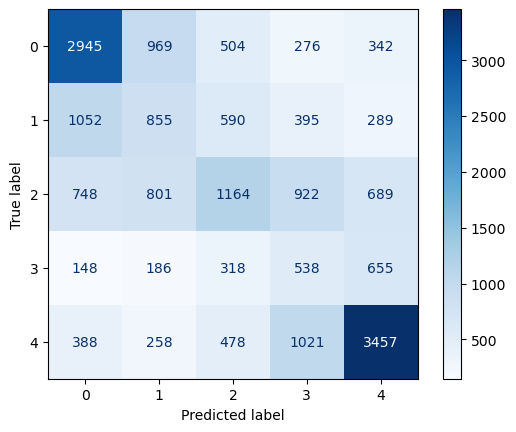

In [117]:
#start working on the naive bays classification 
from sklearn.naive_bayes import GaussianNB


NB = GaussianNB()
NB.fit(X_train.toarray(), y_train)  # Convert X_train to dense numpy array to work in json file
y_pred = NB.predict(X_test.toarray())  # Convert X_test to dense numpy array to work in json file

#calculating the confusion matrix TN, FP, FN, TP 
cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# calculating the accuracy 
accuracy = (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))
print(NB.__class__.__name__)
print('True Positive(TP)  = ', TP, np.round(TP / (TP + FP + TN + FN) * 100, 2))
print('False Positive(FP) = ', FP, np.round(FP / (TP + FP + TN + FN) * 100, 2))
print('True Negative(TN)  = ', TN, np.round(TN / (TP + FP + TN + FN) * 100, 2))
print('False Negative(FN) = ', FN, np.round(FN / (TP + FP + TN + FN) * 100, 2))

#ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [118]:
# classification_report for the model we built
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.56      0.58      0.57      5036
           2       0.28      0.27      0.27      3181
           3       0.38      0.27      0.32      4324
           4       0.17      0.29      0.22      1845
           5       0.64      0.62      0.63      5602

    accuracy                           0.45     19988
   macro avg       0.40      0.41      0.40     19988
weighted avg       0.46      0.45      0.45     19988



In [122]:

from sklearn.metrics import roc_auc_score


NB.fit(X_train.toarray(), y_train)  # Convert X_train to dense numpy array
# Get predicted probabilities for each class
y_pred_prob = NB.predict_proba(X_test.toarray())  # Convert X_test to dense numpy array

# Calculate ROC AUC scores for each class
auc_scores = []
for class_idx in range(NB.classes_.size):
    y_true_class = (y_test == NB.classes_[class_idx]).astype(int)
    y_pred_class = y_pred_prob[:, class_idx]
    auc_scores.append(roc_auc_score(y_true_class, y_pred_class))

# Print the ROC AUC scores for each class
for class_idx,  auc in enumerate(auc_scores):
    print("Class {}:ROC AUC = {:0.3f}".format(class_idx, auc))

Class 0:ROC AUC = 0.794
Class 1:ROC AUC = 0.667
Class 2:ROC AUC = 0.685
Class 3:ROC AUC = 0.658
Class 4:ROC AUC = 0.822
